<a href="https://colab.research.google.com/github/MattiaFiore/Source-Coding-Project/blob/main/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to libraries

In this Notebook we will introduce the libraries which will be used in the other notebooks. Only the functionalities that are used will be covered.
The library used are:

*   itertools
*   collections
*   matplotlib
*   networkx

We'll also introduce some general topics which are used and may not be familiar:


*   List comprehension
*   Dicionary Comprehension
*   Tree data structure





# Itertools
In this library you can find iterator build blocks. We will just take a look at the product function.

More on: https://docs.python.org/3/library/itertools.html#module-itertools


The product function is used to do the cartesian product

In [ ]:
from itertools import product

In [ ]:
symbols = ['A', 'B']
groups = list(product(symbols, repeat = 2))
print(groups)

[('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'B')]


# Collections
In this library it is possible to find specialized container datatypes. We'll analyze only the Counter object.

More on: https://docs.python.org/3/library/collections.html

In [ ]:
from collections import Counter

Counter object generate a dictionary from an iterable counting how many time it was found. Since it is a dictionary subclass we can use methods:


*   .keys()
*   .values()

There are also other important methods:


*   .most_common(n): gives the n most common elements
*   .total() : gives the total amount of counts





In [ ]:
text = '''Lorem ipsum dolor sit amet. Qui laborum iste eos dolorum optio et odio
 numquam est internos expedita id similique galisum ut quasi laboriosam 33
 dolorem nisi. Qui tempora iusto rem minima iusto aut provident totam At animi
 laudantium et vero vitae ea ratione sunt rem sint eveniet. Et dicta dolores
 sed nemo enim est rerum voluptatum qui placeat dolore est voluptatem molestiae
 aut iure corrupti.'''

count = Counter(text)
print(count.most_common(1))
print("*"*10)
print(count.most_common(3))
print("*"*10)
print(count.total())

[(' ', 66)]
**********
[(' ', 66), ('e', 36), ('i', 36)]
**********
403


# Matplotlib
Matplotlib is a very important library that can be used to create charts.
We will see how to create a plot and a bar graph.


More on: https://matplotlib.org/

First of all we need to import the library, since the library has a very long name it is always assigned with an alias by all python programmers.

In [ ]:
import matplotlib.pyplot as plt

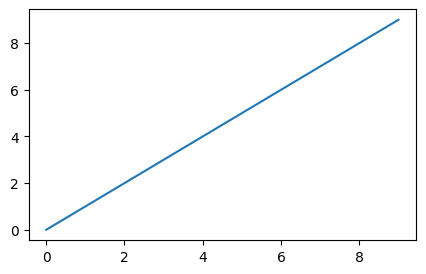

In [ ]:
x_axes = [i for i in range(10)]
y_axes = [i for i in range(10)]

# with this line of code it is possible to set
# the size of the chart
plt.rcParams['figure.figsize'] = (5, 3)

# with this line we are able to plot the graph
plt.plot(x_axes, y_axes)

<BarContainer object of 10 artists>

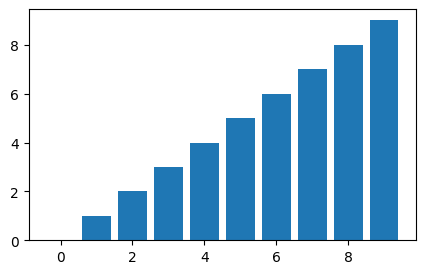

In [ ]:
# with this line of code we create a bar plot
plt.bar(x_axes, y_axes)

<BarContainer object of 4 artists>

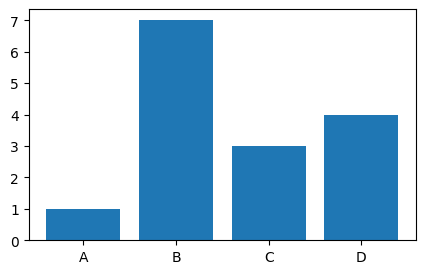

In [ ]:
dictionary = {'A' : 1,
              'B' : 7,
              'C' : 3,
              'D' : 4}

plt.bar(dictionary.keys(), dictionary.values())

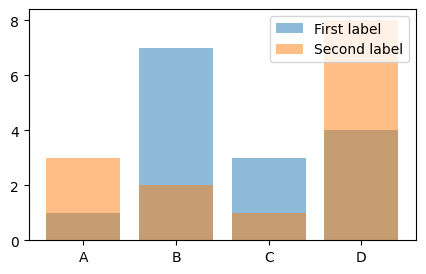

In [ ]:
dictionary = {'A' : 1,
              'B' : 7,
              'C' : 3,
              'D' : 4}

dictionary_2 = {'A' : 3,
              'B' : 2,
              'C' : 1,
              'D' : 8}

# with the alpha parameter we can set the transparency of the
# bar. The number can be set from 0 to 1. The lower it is set
# the more it will be transparent
plt.bar(dictionary.keys(), dictionary.values(), alpha = 0.5)
plt.bar(dictionary_2.keys(), dictionary_2.values(), alpha = 0.5)

# with this code we can set the legend
plt.legend(['First label', 'Second label'])

# Networkx

With this library we can create visualization of graphs.

More on: https://networkx.org/

In [ ]:
import networkx as nx

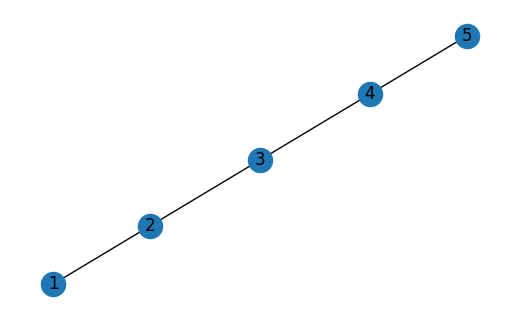

In [ ]:
#Initializing the graph object
G = nx.Graph()

# adding nodes
G.add_nodes_from([1,2,3,4,5])
# adding edges
G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])

nx.draw(G, with_labels = True)

If you try to execute the previous cell more than one time you will notice that the plot is not always the same.

To have always the same graph displayed you can set the positions of the nodes using a dictionary. In the following example you build a tree structure using a dictionary.




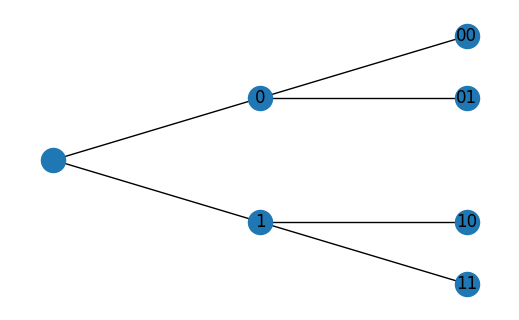

In [ ]:
G = nx.Graph()

# adding nodes
G.add_nodes_from(['','0', '1', '00','01', '10', '11'])
# adding edges
G.add_edges_from([('','0'), ('','1'), ('0','00'), ('0','01'), ('1', '10'), ('1', '11')])

pos = {
    '': (0,0),
    '0': (1,1),
    '1': (1,-1),
    '00': (2, 2),
    '01': (2,1),
    '10': (2,-1),
    '11': (2, -2)
}

nx.draw(G,pos = pos , with_labels = True)

We are also interested in animating this graphs and download the resulting file. It is possible to set the resolution using dpi (dots per inch).

dpi = 300 is a very good resolution.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc


nc = ['blue', 'blue', 'blue', 'red']
G = nx.Graph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([(0,1), (1,2), (2,3)])
n = len(G.nodes())
pos = {0 : (1,1),
       1 : (2,1),
       2 : (3,1),
       3 : (4,1)}

#nx.draw(G, pos=pos, node_color= colormap)


# create the frame
def update(i, n, nodes):

  colormap = ['blue' for i in range(n-1)]
  colormap.insert(i%n, 'orange')
  nodes.set_color(colormap)
  return nodes,


# set up the image
fig = plt.figure()

nodes = nx.draw_networkx_nodes(G,pos,node_color=nc,node_size=400)
edges = nx.draw_networkx_edges(G,pos)
labels = {}
names = ['00', '11', '01', '10']
for i in range(0,n):
  labels[i] = r"$"+names[i]+"$"

nx.draw_networkx_labels(G, pos, labels, font_size=12)

# create animation
anim = animation.FuncAnimation(fig, update, fargs = (n, nodes), frames=100, interval=1000, blit = True)
plt.close()
rc('animation', html='jshtml')
#anim.save('simple_animation.mp4', writer="ffmpeg", dpi=300)
anim


# List Comprehension
It is a very powerful technique that allows to create lists using a very minimal syntax

In [ ]:
power_of_two = []
n = 10
for i in range(n):
  power_of_two.append(2**i)

power_of_two

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

We can rewrite the same thing using the list comprehension technique which will be much more compact

In [ ]:
n = 10
power_of_two = [2**i for i in range(n)]

power_of_two

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

We  can also add conditions to the list comprehension

In [ ]:
text = "Hello world !"
no_spaces = [i for i in text if i != ' ' and i != '!']
no_spaces

['H', 'e', 'l', 'l', 'o', 'w', 'o', 'r', 'l', 'd']

# Dictionary Comprehension
Dictionary comprehension works in the same way but with a dictionary

In [ ]:
dictionary = {}
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

for i in range(len(letters)):
  dictionary[letters[i]] = i

dictionary

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

The same can be achieved by using a dictionary comprehension

In [ ]:
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
dicitonary = {letters[i]: i for i in range(len(letters))}
dictionary

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

# Binary Tree data structure
Binary Tree data structure is very important for the Huffman decoder.

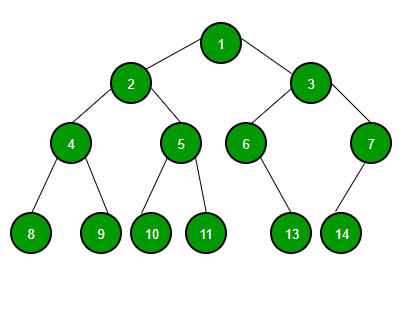

Source of the image: https://www.geeksforgeeks.org/binary-tree-data-structure/

If we need to construct the tree we must first create a class for the Node and then a class for the actual tree. We are just going to create a datastructure that will help us decode the huffman technique and will help us in the visualization procedure.

In [ ]:
class Node():

  def __init__(self, string = '', parent = None):

    self.string = string
    self.parent = parent
    self.left = None
    self.right = None

  def get_string(self):
    return self.string

  def get_left(self):
    return self.left

  def get_right(self):
    return self.right

  def set_string(self, new_string):
    self.string = new_string

  def set_left(self, new_left):
    self.left = new_left

  def set_right(self, new_right):
    self.right = new_right

  def __str__(self):
    return self.get_string()


In [ ]:
class Tree():

  def __init__(self):
    # Root is a node with no parent
    # no left no right child at the moment
    # No string attached

    self.root = Node('Root')
    self.node_names = [self.root.get_string()]
    self.edges = []

  def search(self, father):

    # father is a string
    node = self.get_root()

    if father == 'Root':
      return self.get_root()

    for i in father:
      if i == '0':
        node = node.get_left()
        pass
      else:
        node = node.get_right()

    return node

  def add_child(self, father, child):

    """
    Father: is the data string
    Child: is the data string

    Our logic will be 0 on the left and 1 on the right

                      Root
                   /        \
                  0          1
                /   \      /   \
               00   01    10    11


    """
    # We first search for the father
    father_node = self.search(father)

    if child[-1] == '0':
      father_node.set_left(Node(string = 'child', parent = father_node))

    else:
      father_node.set_left(Node(string = 'child', parent = father_node))


    self.node_names.append(child)
    self.edges.append((child, father))

  def get_node_names(self):
    return self.node_names

  def get_edges(self):
    return self.edges

  def get_root(self):
    return self.root



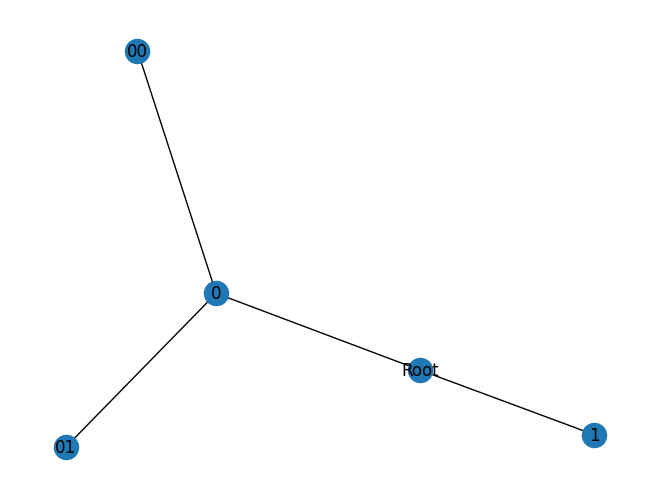

In [ ]:
import networkx as nx

tree = Tree()
G = nx.Graph()


tree.add_child('Root', '0')
tree.add_child('Root', '1')
tree.add_child('0', '00')
tree.add_child('0', '01')

G.add_nodes_from(tree.get_node_names())
G.add_edges_from(tree.get_edges())
nx.draw(G, with_labels = True)


Now we just need a function to plot themm in a binnary tree form.
We will just create a function for computing the positions

In [ ]:
tree.get_node_names()

['Root', '0', '1', '00', '01']

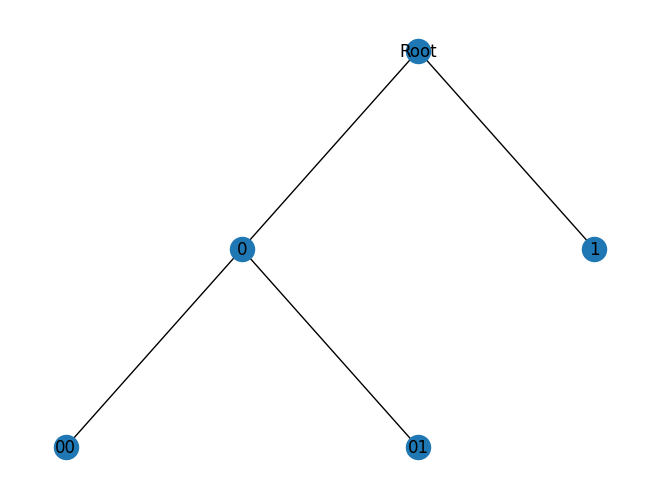

In [ ]:
pos = {i:(0,-len(i)) for i in tree.get_node_names()}
pos['Root'] = (0,0)

nx.draw(G,pos = pos, with_labels = True)